In [ ]:
# Optional: mounting to Google Drive to read the data files.
from google.colab import drive
mount_path = '/content/gdrive'
drive.mount(mount_path)
notebook_root = 'gdrive/My Drive/mafat'

Mounted at /content/gdrive


# Importing and processing data

In [ ]:
%cd '/content/gdrive/My Drive/mafat'
from support_files import load_data, data_preprocess, append_dict, describe_dict
import numpy as np

train_path = 'MAFAT RADAR Challenge - Training Set V1'
train_df = load_data(train_path)
# train_df = data_preprocess(train_df.copy())
# train_df['source'] = np.zeros_like(train_df["target_type"])

aux2_path = 'MAFAT RADAR Challenge - Auxiliary Synthetic Set V2'
aux2_df = load_data(aux2_path)
# aux2_df = data_preprocess(aux2_df.copy())
aux2_df['source'] = np.ones_like(aux2_df["target_type"])

aux1_path = 'MAFAT RADAR Challenge - Auxiliary Experiment Set V2'
aux1_df = load_data(aux1_path)
# aux1_df = data_preprocess(aux1_df.copy())
# temp = np.ones_like(aux1_df["target_type"])
# temp = [2 for x in temp]
# aux1_df['source'] = np.array(temp)

# main_train_df = append_dict(train_df, aux2_df)
# main_train_df = append_dict(main_train_df, aux1_df)
# describe_dict(main_train_df, "All Data Before Split")

background_path = 'MAFAT RADAR Challenge - Auxiliary Background(empty) Set V2'
back1_df = load_data(background_path)

/content/gdrive/.shortcut-targets-by-id/1CjXe8JAlTXTHOBVrITA52MQVVfPU_uah/mafat


In [ ]:
import pandas as pd

sources = [train_df, aux1_df, aux2_df]#, back1_df]

tids = np.hstack([s['track_id'].astype(int) for s in sources]).reshape(1,-1)
gids = np.hstack([s['geolocation_id'].astype(int) for s in sources] ).reshape(1,-1)
sids = np.hstack([s['sensor_id'].astype(int) for s in sources] ).reshape(1,-1)
snrs = np.hstack([s['snr_type'] for s in sources] ).reshape(1,-1)
srcs = np.hstack([np.ones_like(s['snr_type'])*i for i,s in enumerate(sources)]).reshape(1,-1).astype('object')
srcs[srcs==0] = 'Training set'
srcs[srcs==1] = 'Experiment set'
srcs[srcs==2] = 'Synthetic set'

df = pd.DataFrame(np.array([tids, gids, sids, snrs, srcs]).T.squeeze(), columns=['Track id', 'Geolocation id', 'Sensor id', 'SNR type', 'Source'])
df.loc[df['Source'] == 'Synthetic set', 'Track id'] += 2000000
df = df.drop_duplicates('Track id')
df

,Track id,Geolocation id,Sensor id,SNR type,Source
0,11,1,1,HighSNR,Training set
1,16,1,1,HighSNR,Training set
3,29,1,1,HighSNR,Training set
14,31,1,1,HighSNR,Training set
20,32,1,1,HighSNR,Training set
...,...,...,...,...,...
106536,2281936,7,13,SynthSNR,Synthetic set
106561,2281940,7,13,SynthSNR,Synthetic set
106586,2281950,7,13,SynthSNR,Synthetic set
106605,2281988,7,13,SynthSNR,Synthetic set


In [ ]:
srcs

array([['Training set', 'Training set', 'Training set', ...,
        'Synthetic set', 'Synthetic set', 'Synthetic set']], dtype=object)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'Number of tracks')

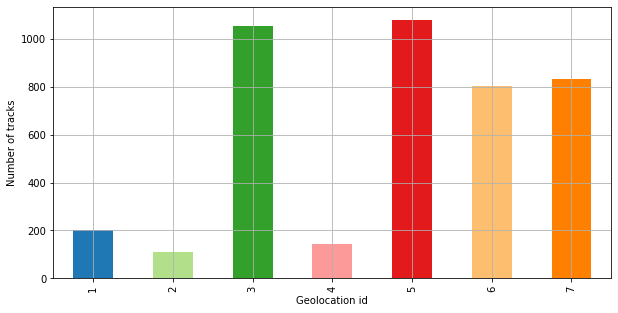

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(10,5))
colors = df['Geolocation id'].astype('category').value_counts().index.categories.to_list()
cm = cm.get_cmap('Paired')
df['Geolocation id'].astype('category').value_counts().sort_index().plot.bar(colormap='Paired',color=cm(colors))
plt.grid('both')
plt.xlabel('Geolocation id')
plt.ylabel('Number of tracks')

In [ ]:
df['Geolocation id'].astype('category').value_counts().index.categories.to_list()

[1, 2, 3, 4, 5, 6, 7]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0, 0.5, 'Number of tracks')

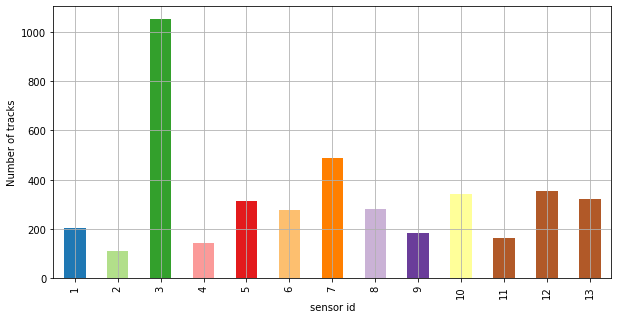

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(10,5))
colors = df['Sensor id'].astype('category').value_counts().index.categories.to_list()
cm = cm.get_cmap('Paired')

df['Sensor id'].astype('category').value_counts().sort_index().plot.bar(colormap='Paired',color=cm(colors))
plt.grid('both')
plt.xlabel('sensor id')
plt.ylabel('Number of tracks')

In [ ]:
df.groupby(['SNR type', 'Source']).size()

SNR type  Source        
HighSNR   Experiment set    2683
          Training set       566
LowSNR    Experiment set      35
          Training set       944
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['SNR type'] = df['SNR type'].astype('category')
df[['SNR type', 'Source']].plot.bar(stacked=True)
plt.grid('both')
plt.ylabel('Number of tracks')

TypeError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
tids = np.hstack([s['track_id'].astype(int) for s in sources]).reshape(1,-1)
sids = np.hstack([s['segment_id'].astype(int) for s in sources] ).reshape(1,-1)
targets = np.hstack([s['target_type'] for s in sources] ).reshape(1,-1)



df2 = pd.DataFrame(np.array([tids, sids, targets]).T.squeeze(), columns=['Track id', 'Segment id', 'Target'])
df2 = df2.drop_duplicates('Segment id')
df2

,Track id,Segment id,Target
0,11,0,animal
1,16,1,animal
2,16,2,animal
3,29,3,animal
4,29,4,animal
...,...,...,...
55722,280731,10920,human
55723,280731,10921,human
55724,280997,10922,human
55725,281732,10923,human


(1, 100000.0)

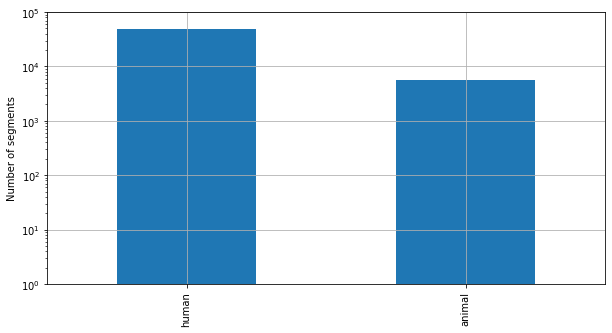

In [ ]:
plt.figure(figsize=(10,5))
df2['Target'].astype('category').value_counts().plot.bar()
plt.grid('both')
plt.ylabel('Number of segments')
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')
from matplotlib.ticker import FormatStrFormatter
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1d"))
plt.ylim([1,1e5])


In [ ]:
df['Sensor id'].min(),df['Sensor id'].max()

(1, 13)

# Analyze Geographies


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def show_distribution(key, data, x_label, height = 50000):
  df = pd.DataFrame()
  df[key] = data[key]

  df_agg = df.loc[:, [key]]
  vals = [df[key].values.tolist() for i in df_agg]

  # Draw
  plt.figure(figsize=(10,9), dpi= 80)
  colors = [plt.cm.RdYlGn(i/float(len(vals)-0.3)) for i in range(len(vals))]
  n, bins, patches = plt.hist(vals, df[key].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)], rwidth = 0.75)

  # Decoration
  plt.title(f"Stacked Histogram of ${key}$", fontsize=22)
  plt.xlabel(key)
  plt.ylabel("Frequency")
  plt.ylim(0, height)
  plt.xticks(ticks=bins, labels=np.unique(df[key]).tolist(), rotation=90, horizontalalignment='left')
  plt.show()


def show_distribution_grouping(key, gkey, data, x_label, height = 50000):
  df = pd.DataFrame()
  df[key] = data[key]
  df[gkey] = data[gkey]

  df_agg = df.loc[:, [key, gkey]].groupby(gkey)
  vals = [df[key].values.tolist() for i, df in df_agg]

  # Draw
  plt.figure(figsize=(10,9), dpi= 80)
  colors = [plt.cm.RdYlGn(i/float(len(vals)-0.3)) for i in range(len(vals))]
  n, bins, patches = plt.hist(vals, df[key].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)], rwidth = 0.75)

  # Decoration
  plt.legend({group:col for group, col in zip(np.unique(df[gkey]).tolist(), colors[:len(vals)])})
  plt.title(f"Stacked Histogram of ${key}$ colored by ${gkey}$", fontsize=22)
  plt.xlabel(key)
  plt.ylabel("Frequency")
  plt.ylim(0, height)
  plt.xticks(ticks=bins, labels=np.unique(df[key]).tolist(), rotation=90, horizontalalignment='left')
  plt.show()

dict_keys(['segment_id', 'track_id', 'geolocation_type', 'geolocation_id', 'sensor_id', 'snr_type', 'date_index', 'target_type', 'doppler_burst', 'iq_sweep_burst', 'source'])


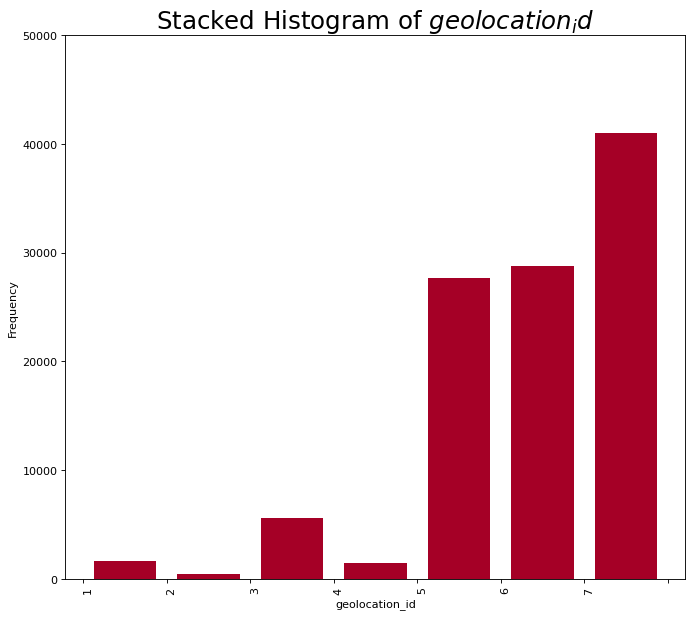

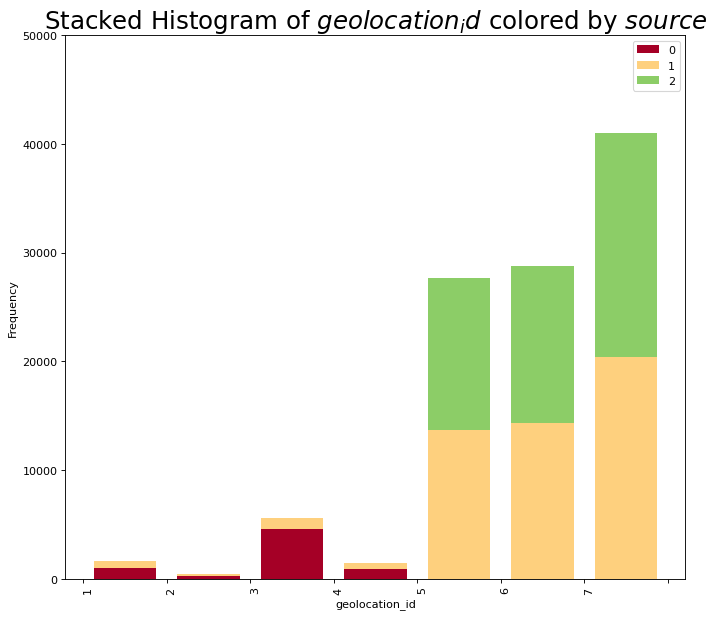

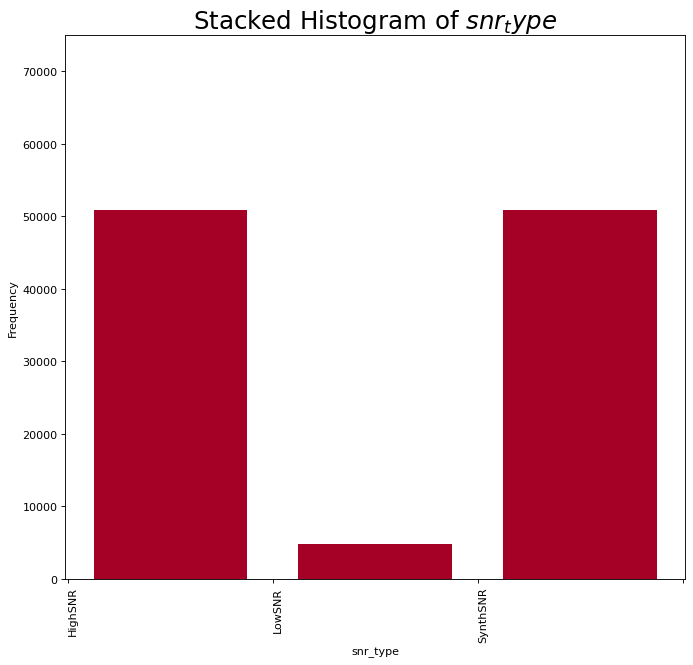

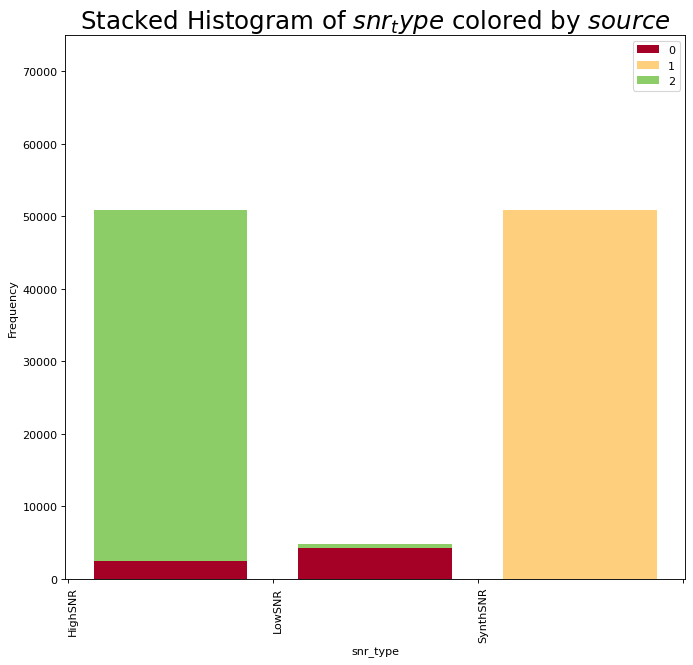

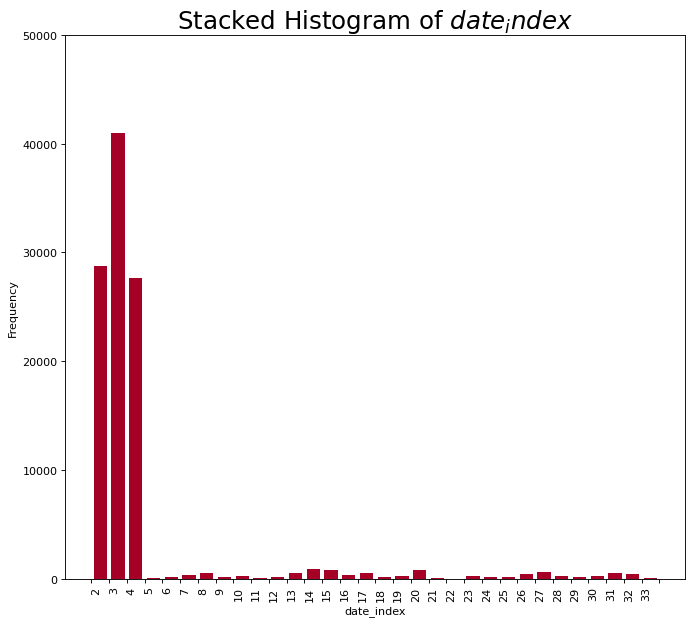

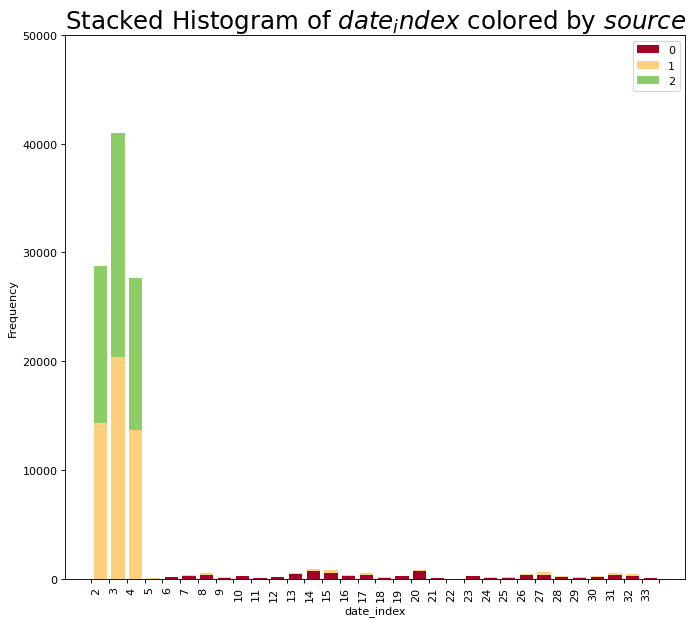

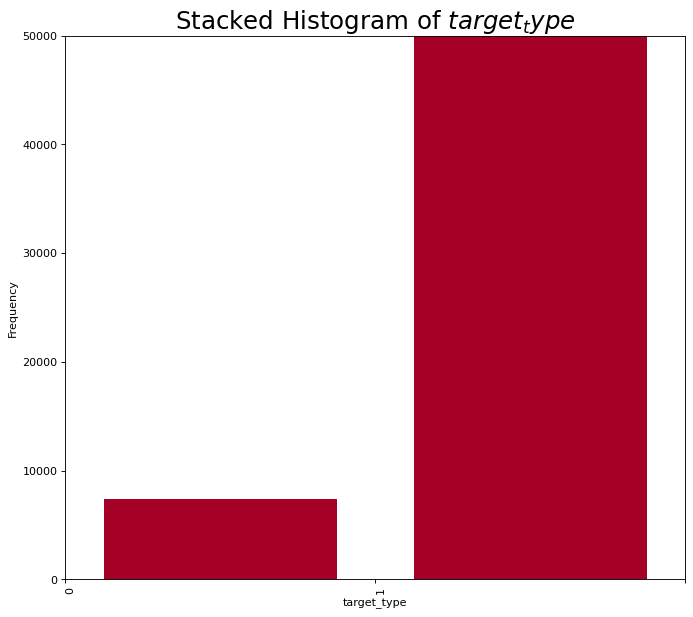

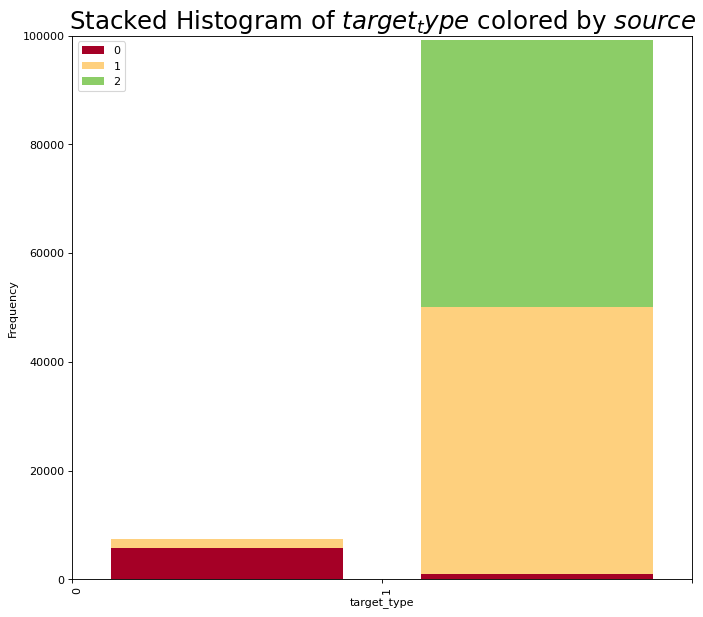

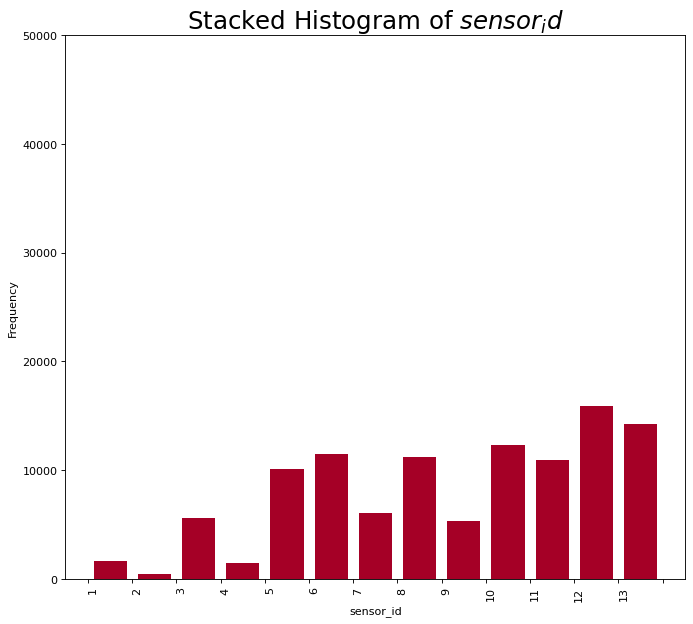

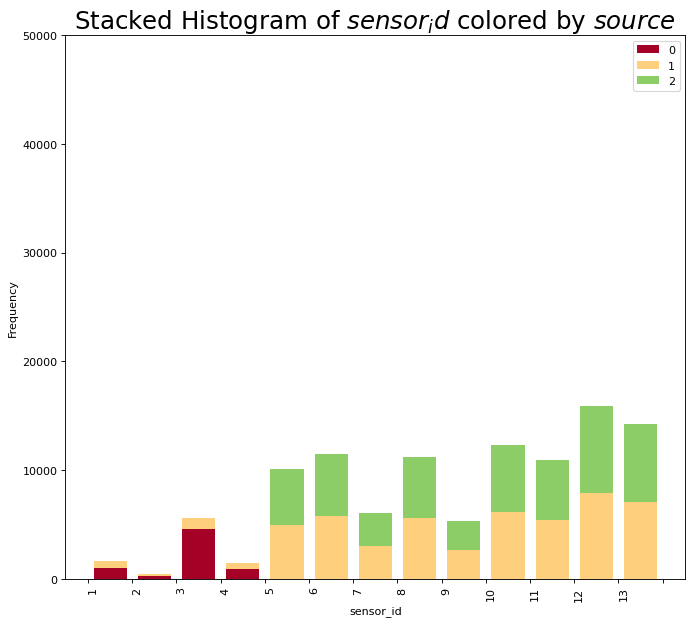

In [ ]:
print(main_train_df.keys())
show_distribution('geolocation_id', main_train_df, 'Geolocation Type')
show_distribution_grouping('geolocation_id', 'source', main_train_df, 'Geolocation Type')

show_distribution('snr_type', main_train_df, 'SNR Type', 75000)
show_distribution_grouping('snr_type', 'source', main_train_df, 'SNR Type', 75000)


show_distribution('date_index', main_train_df, 'Date Index')
show_distribution_grouping('date_index', 'source', main_train_df, 'Date Index')


show_distribution('target_type', main_train_df, 'Target Type')
show_distribution_grouping('target_type', 'source', main_train_df, 'Target Type', 100000)

show_distribution('sensor_id', main_train_df, 'Sensor ID')
show_distribution_grouping('sensor_id', 'source', main_train_df, 'Sensor ID')



In [ ]:
track_ids = main_train_df['track_id']
track_id_counts = [(track_id, list(track_ids).count(track_id)) for track_id in np.unique(track_ids)]


In [ ]:
counts = [count for (id, count) in track_id_counts]
print(counts)


[20, 9, 8, 14, 36, 6, 18, 2, 14, 14, 7, 5, 6, 2, 3, 5, 5, 4, 18, 1, 1, 1, 14, 1, 4, 32, 6, 2, 10, 22, 25, 12, 28, 10, 12, 3, 20, 25, 18, 4, 11, 6, 2, 3, 4, 6, 2, 4, 10, 20, 1, 32, 11, 8, 7, 4, 6, 4, 4, 5, 20, 2, 10, 42, 14, 22, 2, 2, 4, 2, 12, 8, 12, 4, 14, 8, 2, 14, 8, 2, 5, 19, 4, 2, 10, 4, 2, 2, 6, 2, 2, 6, 11, 2, 3, 9, 26, 2, 32, 12, 2, 4, 3, 4, 24, 3, 7, 4, 10, 8, 12, 2, 1, 5, 12, 2, 3, 3, 8, 8, 4, 1, 1, 8, 2, 12, 5, 14, 26, 6, 4, 8, 4, 4, 4, 3, 3, 1, 14, 2, 4, 3, 2, 2, 11, 7, 2, 3, 3, 22, 8, 2, 11, 3, 3, 7, 2, 2, 3, 1, 1, 2, 4, 7, 12, 19, 11, 4, 4, 2, 13, 20, 4, 2, 2, 6, 2, 13, 10, 4, 11, 4, 8, 4, 3, 3, 12, 1, 6, 29, 4, 13, 5, 3, 2, 6, 2, 2, 2, 5, 8, 5, 22, 2, 38, 10, 8, 17, 20, 10, 6, 17, 6, 6, 10, 10, 28, 46, 10, 10, 8, 21, 2, 2, 8, 4, 16, 1, 10, 12, 3, 2, 4, 3, 1, 3, 12, 2, 6, 1, 5, 11, 6, 1, 8, 2, 8, 11, 12, 6, 6, 14, 4, 6, 9, 12, 4, 5, 4, 32, 8, 19, 8, 7, 29, 22, 2, 5, 4, 2, 10, 8, 2, 41, 34, 2, 3, 7, 16, 38, 22, 5, 8, 30, 26, 78, 2, 4, 3, 4, 25, 12, 2, 2, 2, 4, 4, 4, 22, 10

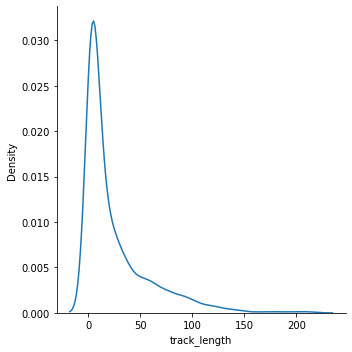

In [ ]:
# show_distribution('track_length', {'track_length': counts}, 'Sensor ID', 1000)
penguins = pd.DataFrame()
penguins['track_length'] = counts
sns.displot(data=penguins, x="track_length", kind="kde")